# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science

## Final Project: Police Violence Investigation

### Initial Exploratory Data Analysis

**Harvard University**<br/>
**Fall 2020**<br/>
**Team Members**: Chika Okafor, Vasco Meerman, Matthew Parker, and David Koupaei

<hr style="height:2pt">



In [1]:
#RUN THIS CELL 
import requests
from IPython.core.display import HTML, display
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

<hr style="height:2pt">

## README

### Layout
#### Section 1: Look at mapping police data set

* Goals
    * See the state of the data
    * Determine if any cleaning is necessary
    * Perform cleaning
    * Initial snapshot look for trends
    * Identify which predictors might be useful
    
#### Section 2: Look at Wapo data set

* Goals
    * See the state of the data
    * Determine if any cleaning is necessary
    * Perform cleaning
    * Initial snapshot look for trends
    * Identify which predictors might be useful
    
#### Section 3: Make some Plots

* Goals
    * Start to generate plots
    
    
#### Section 4: Initial look at models

* Goals
    * Now that the data is understood, take a look at initial models
    * Try a few options and review for feasibility and utility
    
    

## Contents
- [Section 1: Looking at Mapping Police Violence Dataset](#Section-1:-Looking-at-Mapping-Police-Violence-Dataset) 
- [Section 2: Now look at Washington Post Data](#Section-2:-Now-look-at-Washington-Post-Data) 
- [Section 3: Make some Plots!](#Section-3:-Make-some-Plots!)
- [Section 4: Initial Look at Models](#Section-4:-Initial-Look-at-Models)
- [Section 5: Appendix](#Section-5:-Appendix)

<hr style="height:2pt">



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

%matplotlib inline
import censusdata
import seaborn as sns
sns.set(style='whitegrid')
pd.set_option('display.width', 1500)
pd.set_option('display.max_columns', 100)

## Information about the datasets

#### Washingpost dataset
In 2015, The Post began tracking more than a dozen details about each killing — including the race of the deceased, the circumstances of the shooting, whether the person was armed and whether the person was experiencing a mental-health crisis — by culling local news reports, law enforcement websites and social media, and by monitoring independent databases such as Killed by Police and Fatal Encounters. The Post conducted additional reporting in many cases.


#### Mapping Police Violence
This information has been meticulously sourced from the three largest, most comprehensive and impartial crowdsourced databases on police killings in the country: FatalEncounters.org, the U.S. Police Shootings Database and KilledbyPolice.net. We've also done extensive original research to further improve the quality and completeness of the data; searching social media, obituaries, criminal records databases, police reports and other sources to identify the race of 90 percent of all victims in the database.


#### Important notes
Washingpost sources theur data also from the mapping police violence dataset, but they cleaned the data. Meaning that the  mapping police violence dataset has more entries because it also has some NaN values, which could still be of interest for us.

In [3]:
# Data dir path from root of project
data_dir = "./data"

# Load data
data_mapping = pd.read_csv(f'{data_dir}/mapping-police-violence-24oct2020.csv')
# https://github.com/washingtonpost/data-police-shootings
data_wapo = pd.read_csv(f'{data_dir}/fatal-police-shootings-data-wsp.csv')

# Population Data
population_df = pd.read_csv(f'{data_dir}/nst-est2019-alldata.csv')

print(f"{len(data_mapping)} mapping police violence samples")
print(f"{len(data_wapo)} Washington Post Fatal Police Shootings samples")
print("\nMapping Columns:")
print(', '.join(data_mapping.columns))
print("\nWaPo Fatal Shootings Columns:")
print(', '.join(data_wapo.columns))

8507 mapping police violence samples
5716 Washington Post Fatal Police Shootings samples

Mapping Columns:
Victim's name, Victim's age, Victim's gender, Victim's race, URL of image of victim, Date of Incident (month/day/year), Street Address of Incident, City, State, Zipcode, County, Agency responsible for death, ORI Agency Identifier (if available), Cause of death, A brief description of the circumstances surrounding the death, Official disposition of death (justified or other), Criminal Charges?, Link to news article or photo of official document, Symptoms of mental illness?, Unarmed/Did Not Have an Actual Weapon, Alleged Weapon (Source: WaPo and Review of Cases Not Included in WaPo Database), Alleged Threat Level (Source: WaPo), Fleeing (Source: WaPo), Body Camera (Source: WaPo), WaPo ID (If included in WaPo database), Off-Duty Killing?, Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rura

### <div class='exercise'><b>Section 1: Looking at Mapping Police Violence Dataset</b></div>
[▲ Return to contents](#Contents)
<div class='exercise'>
    

    
</div>

In [4]:
display(data_mapping.head())
display(data_mapping.info())
display(data_mapping.describe())


,Victim's name,Victim's age,Victim's gender,Victim's race,URL of image of victim,Date of Incident (month/day/year),Street Address of Incident,City,State,Zipcode,County,Agency responsible for death,ORI Agency Identifier (if available),Cause of death,A brief description of the circumstances surrounding the death,Official disposition of death (justified or other),Criminal Charges?,Link to news article or photo of official document,Symptoms of mental illness?,Unarmed/Did Not Have an Actual Weapon,Alleged Weapon (Source: WaPo and Review of Cases Not Included in WaPo Database),Alleged Threat Level (Source: WaPo),Fleeing (Source: WaPo),Body Camera (Source: WaPo),WaPo ID (If included in WaPo database),Off-Duty Killing?,Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx ),MPV ID,Fatal Encounters ID
0,Name withheld by police,NaN,Male,NaN,NaN,10/14/2020,NaN,Cookson,OK,NaN,Cherokee,Cherokee County Sheriff's Department,OK0110000,"Gunshot, Taser",A deputy responded to a disturbance called aro...,Pending investigation,No known charges,https://www.newson6.com/story/5f87912629c6bb05...,No,Allegedly Armed,spear,attack,Not fleeing,No,6232.0,NaN,NaN,NaN,NaN
1,Name withheld by police,NaN,Male,NaN,NaN,10/14/2020,NaN,South Los Angeles,CA,NaN,Los Angeles,Los Angeles Police Department,CA0194200,Gunshot,Around 9:50PM officers were driving by the 76 ...,Pending investigation,No known charges,https://ktla.com/news/local-news/lapd-suspect-...,No,Allegedly Armed,gun,attack,Not fleeing,No,6231.0,NaN,NaN,NaN,NaN
2,Name withheld by police,NaN,Male,White,NaN,10/14/2020,NaN,Chico,CA,NaN,Butte,Chico Police Department,CA0040200,Gunshot,A man who reportedly brandished a knife and th...,Pending investigation,No known charges,https://www.chicoer.com/2020/10/15/chico-polic...,No,Allegedly Armed,knife,attack,foot,No,6230.0,NaN,NaN,NaN,NaN
3,Marcos Ramirez,27,Male,Hispanic,NaN,10/13/2020,NaN,Bakersfield,CA,NaN,Kern,Bakersfield Police Department,CA0150200,Gunshot,Bakersfield police shot and killed a man they ...,Pending investigation,No known charges,https://www.turnto23.com/news/crime/bpd-invest...,No,Allegedly Armed,knife,attack,foot,Yes,6228.0,NaN,NaN,NaN,NaN
4,Anthony Jones,24,Male,NaN,NaN,10/12/2020,NaN,Bethel Springs,TN,NaN,McNairy,NaN,NaN,Gunshot,Jones was shot in McNairy County after police ...,Pending investigation,No known charges,https://www.wkrn.com/news/tennessee-news/tenne...,No,Unarmed/Did Not Have an Actual Weapon,no object,other,car,No,6229.0,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8507 entries, 0 to 8506
Data columns (total 29 columns):
 #   Column                                                                                                                                                                      Non-Null Count  Dtype  
---  ------                                                                                                                                                                      --------------  -----  
 0   Victim's name                                                                                                                                                               8507 non-null   object 
 1   Victim's age                                                                                                                                                                8492 non-null   object 
 2   Victim's gender                                                                     

None

,Zipcode,WaPo ID (If included in WaPo database),MPV ID,Fatal Encounters ID
count,8465.000000,5592.000000,8485.000000,8417.000000
mean,60584.679622,3116.519134,4261.408721,20024.425686
std,28088.279417,1765.307092,2454.204918,5196.315249
min,1085.000000,3.000000,1.000000,350.000000
25%,33525.000000,1591.750000,2139.000000,15550.000000
50%,67203.000000,3111.500000,4262.000000,18525.000000
75%,85756.000000,4639.250000,6386.000000,25052.000000
max,99801.000000,6232.000000,8511.000000,28933.000000


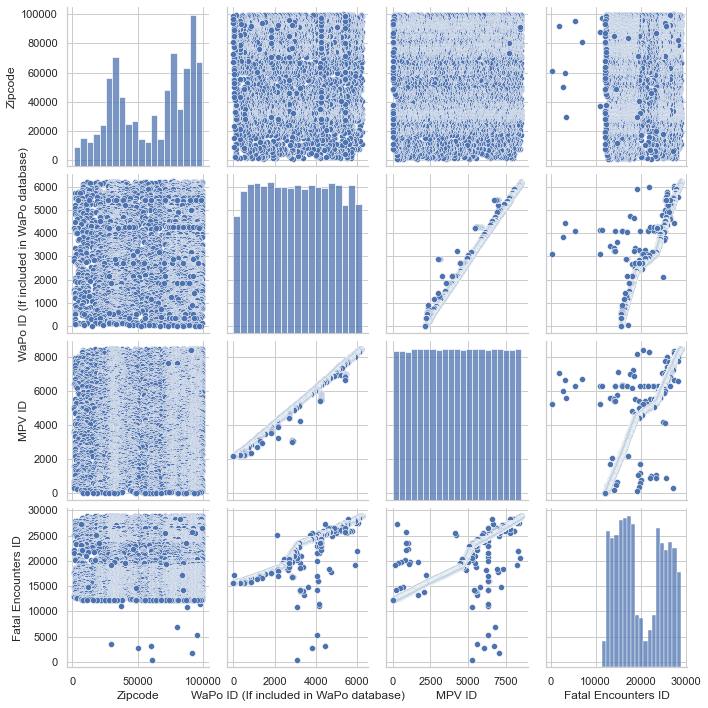

In [5]:
sns.pairplot(data=data_mapping)


In [6]:
# do we have any null values?

data_mapping.isnull().values.any()

# where are they?

for col in data_mapping.columns:
    null_count = data_mapping[col].isnull().sum()
    print(col, ": ", null_count)

Victim's name :  0
Victim's age :  15
Victim's gender :  13
Victim's race :  4
URL of image of victim :  3939
Date of Incident (month/day/year) :  0
Street Address of Incident :  95
City :  6
State :  0
Zipcode :  42
County :  14
Agency responsible for death :  16
ORI Agency Identifier (if available) :  2
Cause of death :  0
A brief description of the circumstances surrounding the death :  17
Official disposition of death (justified or other) :  11
Criminal Charges? :  0
Link to news article or photo of official document :  11
Symptoms of mental illness? :  11
Unarmed/Did Not Have an Actual Weapon :  0
Alleged Weapon (Source: WaPo and Review of Cases Not Included in WaPo Database) :  2
Alleged Threat Level (Source: WaPo) :  2451
Fleeing (Source: WaPo) :  2893
Body Camera (Source: WaPo) :  2996
WaPo ID (If included in WaPo database) :  2915
Off-Duty Killing? :  8268
Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full

In [7]:
# drop some of the columns which have too many N/A or don't really help us

# not used and lots of missing
df1 = data_mapping.drop('URL of image of victim', axis=1)

# almost all NaN
df1 = df1.drop('Off-Duty Killing?', axis=1)

# not really used
df1 = df1.drop(['Street Address of Incident',
                'A brief description of the circumstances surrounding the death',
                "Victim's name",
                'Link to news article or photo of official document',
                'ORI Agency Identifier (if available)'],
                axis=1)

# rename a few annoying columns
df1.rename(columns={'Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx )':'geography'}, inplace=True)
df1.rename(columns={'Alleged Weapon (Source: WaPo and Review of Cases Not Included in WaPo Database)':'Alleged Weapon'}, inplace=True)

# fix a few of the duplicate groupings

df1['Symptoms of mental illness?'] = df1['Symptoms of mental illness?'].str.replace('unknown', 'Unknown')
df1['Symptoms of mental illness?'] = df1['Symptoms of mental illness?'].str.replace('Unkown', 'Unknown')

df1['Alleged Threat Level (Source: WaPo)'] = df1['Alleged Threat Level (Source: WaPo)'].str.replace('Other', 'other')

df1['Fleeing (Source: WaPo)'] = df1['Fleeing (Source: WaPo)'].str.replace('other', 'Other')
df1['Fleeing (Source: WaPo)'] = df1['Fleeing (Source: WaPo)'].str.replace('not fleeing', 'Not fleeing')
df1['Fleeing (Source: WaPo)'] = df1['Fleeing (Source: WaPo)'].str.replace('Not Fleeing', 'Not fleeing')
df1['Fleeing (Source: WaPo)'] = df1['Fleeing (Source: WaPo)'].str.replace('foot', 'Foot')
df1['Fleeing (Source: WaPo)'] = df1['Fleeing (Source: WaPo)'].str.replace('car', 'Car')

df1['Body Camera (Source: WaPo)'] = df1['Body Camera (Source: WaPo)'].str.replace('no', 'No')
df1['Body Camera (Source: WaPo)'] = df1['Body Camera (Source: WaPo)'].str.replace('Dashcam video', 'Dashcam Video')


Now see what needs further cleaning

In [8]:
for col in df1.columns:
    display(df1[col].value_counts())

25         279
31         275
Unknown    268
27         268
28         266
          ... 
88           1
95           1
79           1
10           1
91           1
Name: Victim's age, Length: 88, dtype: int64

Male           8055
Female          425
Transgender       9
Unknown           4
Male              1
Name: Victim's gender, dtype: int64

White               3739
Black               2138
Hispanic            1467
Unknown race         863
Asian                131
Native American      119
Pacific Islander      46
Name: Victim's race, dtype: int64

6/16/2013     10
12/26/2017     9
5/3/2020       9
1/24/2017      9
2/1/2018       9
              ..
11/24/2013     1
3/1/2014       1
8/28/2016      1
1/3/2015       1
5/6/2013       1
Name: Date of Incident (month/day/year), Length: 2675, dtype: int64

Los Angeles     121
Phoenix         121
Houston         109
Chicago          84
San Antonio      66
               ... 
Three Rivers      1
Cary              1
St. Thomas        1
Bloomsburg        1
Glen Carbon       1
Name: City, Length: 3102, dtype: int64

CA    1312
TX     785
FL     613
AZ     376
GA     299
CO     267
WA     245
NC     236
OK     236
OH     229
MO     226
TN     201
IL     190
PA     185
NY     174
LA     167
NM     158
AL     153
NV     144
IN     141
MD     139
KY     137
VA     136
MI     133
SC     133
WI     125
OR     124
AR     117
MS     115
NJ     113
UT      94
MN      92
KS      80
WV      76
MA      58
ID      53
IA      52
MT      48
AK      47
CT      40
HI      39
NE      39
ME      34
DC      27
SD      26
WY      22
DE      21
NH      18
ND      14
VT      12
RI       6
Name: State, dtype: int64

88001.0    11
93307.0    10
90044.0    10
87121.0    10
85009.0    10
           ..
30428.0     1
78942.0     1
67132.0     1
85085.0     1
37888.0     1
Name: Zipcode, Length: 5329, dtype: int64

Los Angeles    361
Maricopa       231
Harris         136
Jefferson      124
Orange         123
              ... 
Pine             1
Klickitat        1
Churchill        1
Faulkner         1
Garrard          1
Name: County, Length: 1152, dtype: int64

Los Angeles Police Department                                                   132
Phoenix Police Department                                                       116
Los Angeles County Sheriff's Department                                         101
Chicago Police Department                                                        81
New York Police Department                                                       79
                                                                               ... 
St. Charles County Police Department                                              1
Madison Township Police Department                                                1
Antigo Police Department                                                          1
Bentonville Police Department                                                     1
Colorado State Patrol, Avon Police Department, Eagle County Sheriff's Office      1
Name: Agency responsible for death, Length: 3091, dtype: int64

Gunshot                                    7833
Gunshot, Taser                              253
Taser                                       247
Vehicle                                      44
Beaten                                       31
Physical Restraint                           25
Tasered                                      18
Asphyxiated                                   9
Physical restraint                            9
Gunshot, Police Dog                           5
Other                                         5
Pepper Spray                                  4
Gunshot, Pepper Spray                         4
Bean bag                                      2
Taser, Physical Restraint                     2
Beaten/Bludgeoned with instrument             1
Baton, Pepper Spray, Physical Restraint       1
Bomb                                          1
Gunshot, Taser, Baton                         1
Taser, Pepper Spray, Beaten                   1
Gunshot, Stabbed                        

Pending investigation/No Known Charges                                                                 4862
Unreported                                                                                             1225
Justified                                                                                               651
Pending investigation                                                                                   446
Justified by District Attorney                                                                          350
                                                                                                       ... 
Charged, Convicted of felony murder, Sentenced to life in prison                                          1
Cleared by coroner's inquest/Civil suit/Family awarded money                                              1
Charged, Convicted, Sentenced to 5 years in prison                                                        1
Charged with murder, possess

No known charges                                                                 8361
Charged with a crime                                                               69
Charged, Acquitted                                                                 29
Charged, Mistrial                                                                   6
Charged, Charges Dropped                                                            5
Charged, Convicted                                                                  4
Charged, Convicted, Sentenced to 5 years probation.                                 2
Charged, Convicted, Sentenced to life in prison                                     2
Charged, Convicted, Sentenced to 30 years in prison                                 2
Charged, Convicted, Sentenced to 6 years in prison                                  1
Charged, Convicted, Sentenced to 2.5 years in prison                                1
Charged, Convicted, Sentenced to 25 years in prison   

No                     5415
Yes                    1598
Unknown                1164
Drug or alcohol use     318
Unknown                   1
Name: Symptoms of mental illness?, dtype: int64

Allegedly Armed                          6084
Unarmed/Did Not Have an Actual Weapon    1164
Unclear                                   697
Vehicle                                   562
Name: Unarmed/Did Not Have an Actual Weapon, dtype: int64

gun                        4432
knife                      1129
no object                   888
undetermined                532
vehicle                     499
                           ... 
fireworks and gun             1
toy sword                     1
hand torch                    1
baseball bat and bottle       1
hammer and knife              1
Name: Alleged Weapon, Length: 170, dtype: int64

attack          3922
other           1803
undetermined     331
Name: Alleged Threat Level (Source: WaPo), dtype: int64

Not fleeing    3770
Car             937
Foot            732
Other           175
Name: Fleeing (Source: WaPo), dtype: int64

No                    4905
Yes                    592
Surveillance Video       5
Bystander Video          4
Dashcam Video            3
Surveillance video       2
Name: Body Camera (Source: WaPo), dtype: int64

3232.0    2
3784.0    2
6117.0    2
3516.0    2
4731.0    1
         ..
6020.0    1
4650.0    1
3766.0    1
3226.0    1
6144.0    1
Name: WaPo ID (If included in WaPo database), Length: 5588, dtype: int64

Suburban        4240
Urban           2287
Rural           1899
Undetermined      73
Name: geography, dtype: int64

5972.0    2
4603.0    1
4629.0    1
497.0     1
590.0     1
         ..
2906.0    1
2268.0    1
2129.0    1
1794.0    1
8448.0    1
Name: MPV ID, Length: 8484, dtype: int64

28926.0    2
24323.0    2
28921.0    2
28920.0    2
20232.0    1
          ..
25960.0    1
14498.0    1
17377.0    1
14854.0    1
28160.0    1
Name: Fatal Encounters ID, Length: 8413, dtype: int64

Taking a look at the victim's race

In [9]:
data_mapping["Victim's race"].value_counts()

White               3739
Black               2138
Hispanic            1467
Unknown race         863
Asian                131
Native American      119
Pacific Islander      46
Name: Victim's race, dtype: int64

Where are most of the events taking place?


In [10]:
display(df1["State"].value_counts())
display(df1["City"].value_counts())

CA    1312
TX     785
FL     613
AZ     376
GA     299
CO     267
WA     245
NC     236
OK     236
OH     229
MO     226
TN     201
IL     190
PA     185
NY     174
LA     167
NM     158
AL     153
NV     144
IN     141
MD     139
KY     137
VA     136
MI     133
SC     133
WI     125
OR     124
AR     117
MS     115
NJ     113
UT      94
MN      92
KS      80
WV      76
MA      58
ID      53
IA      52
MT      48
AK      47
CT      40
HI      39
NE      39
ME      34
DC      27
SD      26
WY      22
DE      21
NH      18
ND      14
VT      12
RI       6
Name: State, dtype: int64

Los Angeles     121
Phoenix         121
Houston         109
Chicago          84
San Antonio      66
               ... 
Three Rivers      1
Cary              1
St. Thomas        1
Bloomsburg        1
Glen Carbon       1
Name: City, Length: 3102, dtype: int64

In [11]:
# your code here 

df1['Cause of death'].value_counts()

Gunshot                                    7833
Gunshot, Taser                              253
Taser                                       247
Vehicle                                      44
Beaten                                       31
Physical Restraint                           25
Tasered                                      18
Asphyxiated                                   9
Physical restraint                            9
Gunshot, Police Dog                           5
Other                                         5
Pepper Spray                                  4
Gunshot, Pepper Spray                         4
Bean bag                                      2
Taser, Physical Restraint                     2
Beaten/Bludgeoned with instrument             1
Baton, Pepper Spray, Physical Restraint       1
Bomb                                          1
Gunshot, Taser, Baton                         1
Taser, Pepper Spray, Beaten                   1
Gunshot, Stabbed                        

In [12]:
display(df1["Criminal Charges?"].value_counts())

No known charges                                                                 8361
Charged with a crime                                                               69
Charged, Acquitted                                                                 29
Charged, Mistrial                                                                   6
Charged, Charges Dropped                                                            5
Charged, Convicted                                                                  4
Charged, Convicted, Sentenced to 5 years probation.                                 2
Charged, Convicted, Sentenced to life in prison                                     2
Charged, Convicted, Sentenced to 30 years in prison                                 2
Charged, Convicted, Sentenced to 6 years in prison                                  1
Charged, Convicted, Sentenced to 2.5 years in prison                                1
Charged, Convicted, Sentenced to 25 years in prison   

In [13]:
display(df1["Symptoms of mental illness?"].value_counts())

No                     5415
Yes                    1598
Unknown                1164
Drug or alcohol use     318
Unknown                   1
Name: Symptoms of mental illness?, dtype: int64

In [14]:
display(df1["Unarmed/Did Not Have an Actual Weapon"].value_counts())

Allegedly Armed                          6084
Unarmed/Did Not Have an Actual Weapon    1164
Unclear                                   697
Vehicle                                   562
Name: Unarmed/Did Not Have an Actual Weapon, dtype: int64

In [15]:
display(df1["Fleeing (Source: WaPo)"].value_counts())

Not fleeing    3770
Car             937
Foot            732
Other           175
Name: Fleeing (Source: WaPo), dtype: int64

In [16]:
display(df1["Body Camera (Source: WaPo)"].value_counts())

No                    4905
Yes                    592
Surveillance Video       5
Bystander Video          4
Dashcam Video            3
Surveillance video       2
Name: Body Camera (Source: WaPo), dtype: int64

Let's convert all the boolean predictors

In [17]:
# group all of the charges together for now
df1["Criminal Charges?_bool"]= df1["Criminal Charges?"].apply(lambda x: 0 if x=='No known charges' else 1)

# grouping all symptoms not classified as "yes"
df1["Symptoms of mental illness?_bool"]= df1["Symptoms of mental illness?"].apply(lambda x: 1 if x=='Yes' else 0)

# grouping all 'allegedly armed' as "yes" vs all other answers
df1["Unarmed/Did Not Have an Actual Weapon_bool"]= df1["Unarmed/Did Not Have an Actual Weapon"].apply(lambda x: 1 if x=='Allegedly Armed' else 0)

# grouping all spellings of 'not fleeing'
df1["Fleeing (Source: WaPo)_bool"]= df1["Fleeing (Source: WaPo)"].apply(lambda x: 0 if x in ['Not fleeing', 'not fleeing', 'Not Fleeing'] else 1)

# grouping all spellings of 'no'
df1["Body Camera (Source: WaPo)_bool"]= df1["Body Camera (Source: WaPo)"].apply(lambda x: 0 if x in ['No', 'no'] else 1)


In [18]:
display(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8507 entries, 0 to 8506
Data columns (total 27 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Victim's age                                        8492 non-null   object 
 1   Victim's gender                                     8494 non-null   object 
 2   Victim's race                                       8503 non-null   object 
 3   Date of Incident (month/day/year)                   8507 non-null   object 
 4   City                                                8501 non-null   object 
 5   State                                               8507 non-null   object 
 6   Zipcode                                             8465 non-null   float64
 7   County                                              8493 non-null   object 
 8   Agency responsible for death                        8491 non-null   object 
 9

None

Some of these datatypes still need to be recast

In [19]:
# Data type conversions

# age still has some odd values
# display(data_mapping["Victim's age"].head())
df1["Victim's age"] = data_mapping["Victim's age"].fillna(0)
print(df1["Victim's age"].str.isdigit().sum())
df1["Victim's age"]= df1["Victim's age"].apply(lambda x: x if str(x).isdigit() else 0).astype("int")


# drop a few more NaN
#df1 = df1.fillna(str(0))
df1.dropna()

# recast some of the string categories as type string
df1["Victim's gender"] = df1["Victim's gender"].astype('str')
df1["Victim's race"] = df1["Victim's race"].astype('str')
df1["City"] = df1["City"].astype('str')
df1["State"] = df1["State"].astype('str')
df1["County"] = df1["County"].astype('str')
df1["Agency responsible for death"] = df1["Agency responsible for death"].astype('str')
df1["Cause of death"] = df1["Cause of death"].astype('str')
df1["Official disposition of death (justified or other)"] = df1["Official disposition of death (justified or other)"].astype('str')
df1["Symptoms of mental illness?"] = df1["Symptoms of mental illness?"].astype('str')
df1["Unarmed/Did Not Have an Actual Weapon"] = df1["Unarmed/Did Not Have an Actual Weapon"].astype('str')
df1["Alleged Weapon"] = df1["Alleged Weapon"].astype('str')
df1["Fleeing (Source: WaPo)"] = df1["Fleeing (Source: WaPo)"].astype('str')
df1["Body Camera (Source: WaPo)"] = df1["Body Camera (Source: WaPo)"].astype('str')
df1["Alleged Threat Level (Source: WaPo)"] = df1["Alleged Threat Level (Source: WaPo)"].astype('str')
df1["geography"] = df1["geography"].astype('str')

# Add year
df1['year'] = pd.DatetimeIndex(df1['Date of Incident (month/day/year)']).year


8223


In [20]:
display(df1["Victim's gender"].value_counts())

Male           8055
Female          425
nan              13
Transgender       9
Unknown           4
Male              1
Name: Victim's gender, dtype: int64

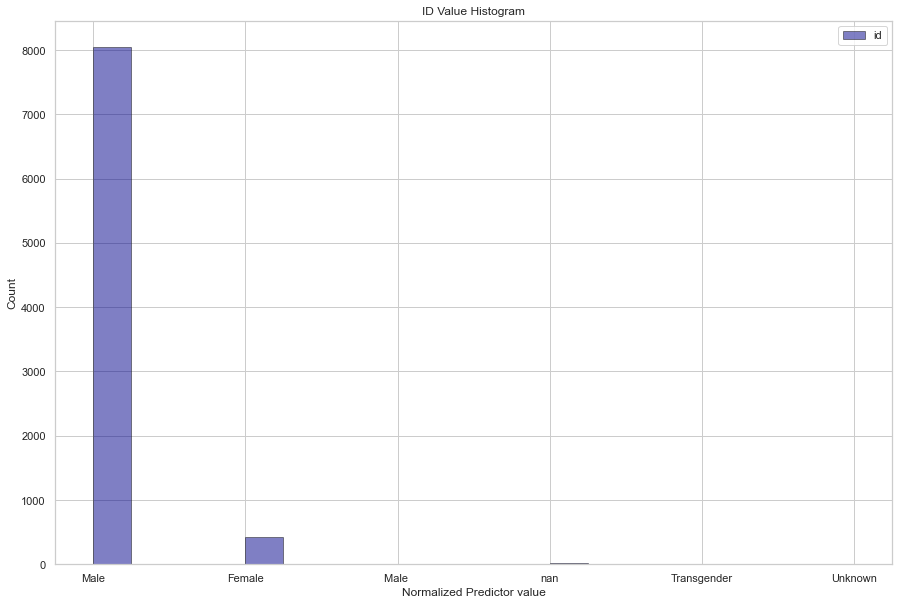

In [21]:
# check Data with histogram
fig = plt.figure(figsize=(15,10))

plt.hist(df1["Victim's gender"], bins=20, alpha = 0.5, edgecolor='k', label='id', color='darkblue')
plt.xlabel('Normalized Predictor value')
plt.ylabel('Count')
plt.title(f'ID Value Histogram')
plt.legend(loc = 'best')

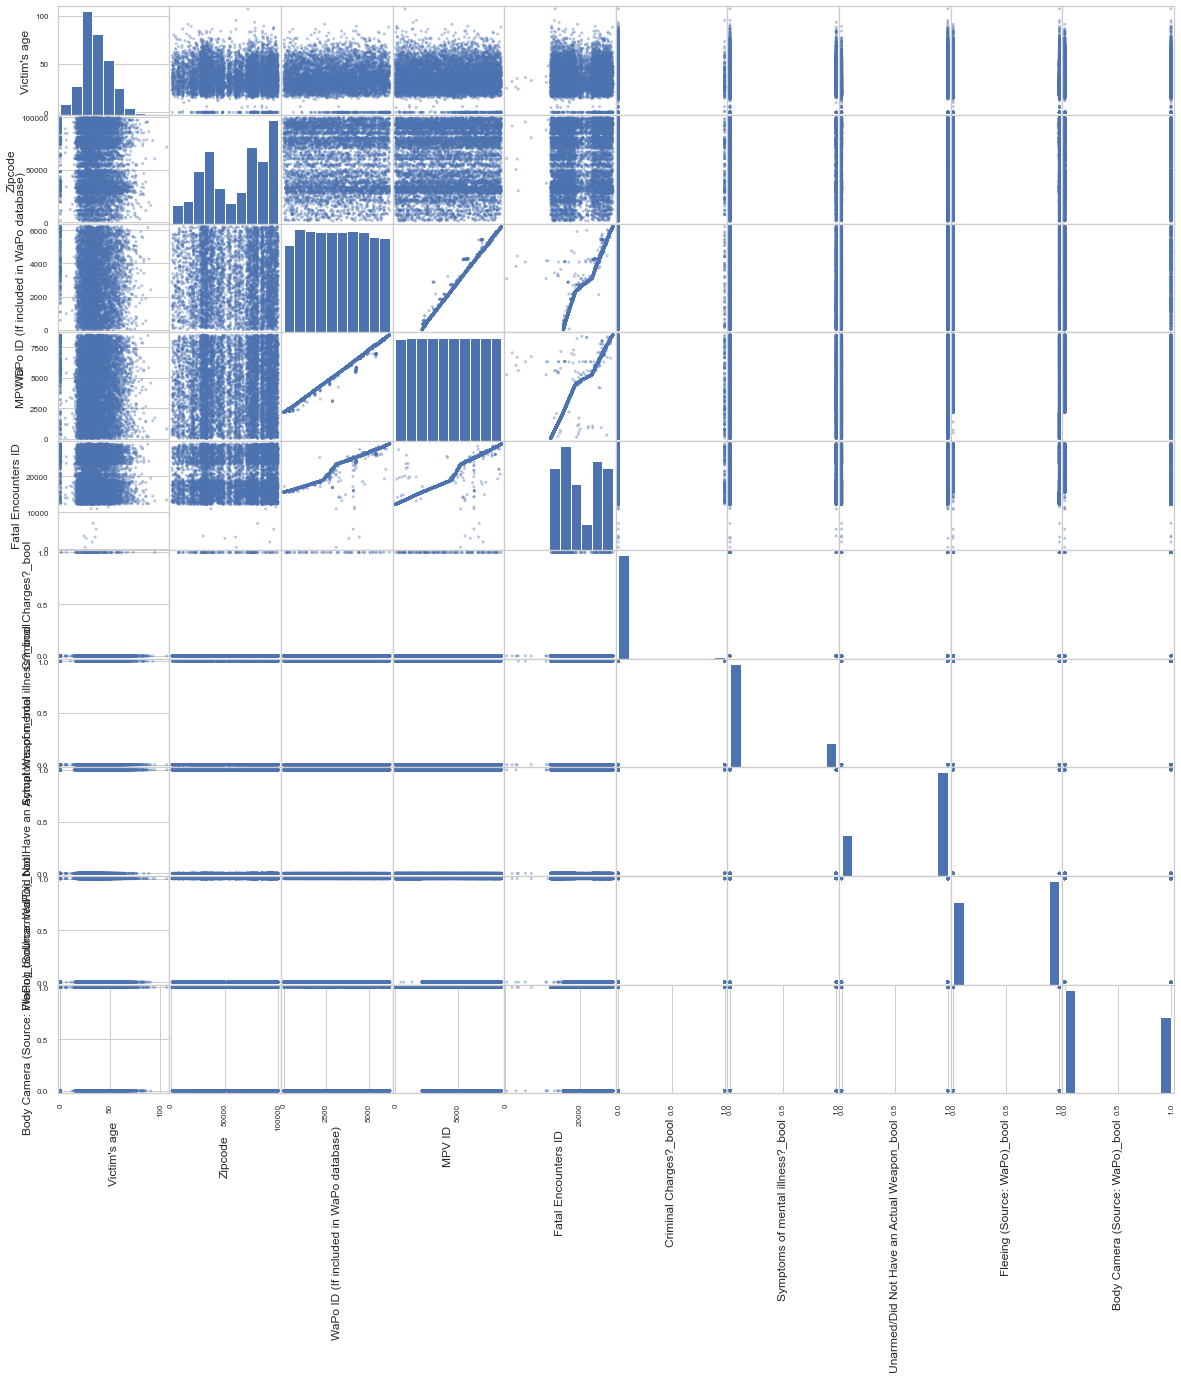

In [22]:
# check float features
grid_features = ["Victim's age", 'Zipcode', 'WaPo ID (If included in WaPo database)', 'MPV ID', 
                 'Fatal Encounters ID','Criminal Charges?_bool', 'Symptoms of mental illness?_bool',  
                 'Unarmed/Did Not Have an Actual Weapon_bool', 'Fleeing (Source: WaPo)_bool',
                 'Body Camera (Source: WaPo)_bool' ]

scatter = pd.plotting.scatter_matrix(df1[grid_features], alpha=0.4, figsize=(20,20));
for ax in scatter.ravel():
    ax.set_xlabel(ax.get_xlabel(), rotation = 90)
    ax.set_ylabel(ax.get_ylabel(), rotation = 90)

### <div class='exercise'><b>Section 2: Now look at Washington Post Data</b></div>
[▲ Return to contents](#Contents)

<div class='exercise'>

    



</div>

In [23]:
display(data_wapo.head())
display(data_wapo.describe())

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True


,id,age,longitude,latitude
count,5716.000000,5456.000000,5437.000000,5437.000000
mean,3173.216235,37.139113,-97.256366,36.650508
std,1789.492388,13.068117,16.629368,5.367021
min,3.000000,6.000000,-158.137000,19.498000
25%,1624.750000,27.000000,-112.134000,33.477000
50%,3174.500000,35.000000,-94.432000,36.100000
75%,4734.250000,46.000000,-83.066000,39.958000
max,6247.000000,91.000000,-68.014000,71.301000


In [24]:
display(data_wapo.columns)

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender', 'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level', 'flee', 'body_camera', 'longitude', 'latitude', 'is_geocoding_exact'], dtype='object')

In [25]:
print('Dataset shape: ', data_wapo.shape)

data_wapo.info()

Dataset shape:  (5716, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5716 entries, 0 to 5715
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       5716 non-null   int64  
 1   name                     5499 non-null   object 
 2   date                     5716 non-null   object 
 3   manner_of_death          5716 non-null   object 
 4   armed                    5503 non-null   object 
 5   age                      5456 non-null   float64
 6   gender                   5715 non-null   object 
 7   race                     5109 non-null   object 
 8   city                     5716 non-null   object 
 9   state                    5716 non-null   object 
 10  signs_of_mental_illness  5716 non-null   bool   
 11  threat_level             5716 non-null   object 
 12  flee                     5426 non-null   object 
 13  body_camera              5716 non-null   bool   
 1

In [26]:
# do we have any null values?

data_wapo.isnull().values.any()

# where are they?

for col in data_wapo.columns:
    null_count = data_wapo[col].isnull().sum()
    print(col, ": ", null_count)

id :  0
name :  217
date :  0
manner_of_death :  0
armed :  213
age :  260
gender :  1
race :  607
city :  0
state :  0
signs_of_mental_illness :  0
threat_level :  0
flee :  290
body_camera :  0
longitude :  279
latitude :  279
is_geocoding_exact :  0


In [27]:
# drop some of the columns which have too many N/A or don't really help us

# not really used
df2 = data_wapo.drop('name', axis=1)


In [28]:
# Convert dae to datetime pandas value 
# https://stackoverflow.com/a/33368021/8970591
# errors=coerce -> 'if the conversion fails for any particular string then those rows are set to NaT'
# errors=raise -> then invalid parsing will raise an exception.
df2['date'] = pd.to_datetime(df2['date'], errors='raise')

Index(['id', 'date', 'manner_of_death', 'armed', 'age', 'gender', 'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level', 'flee', 'body_camera', 'longitude', 'latitude', 'is_geocoding_exact'], dtype='object')

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


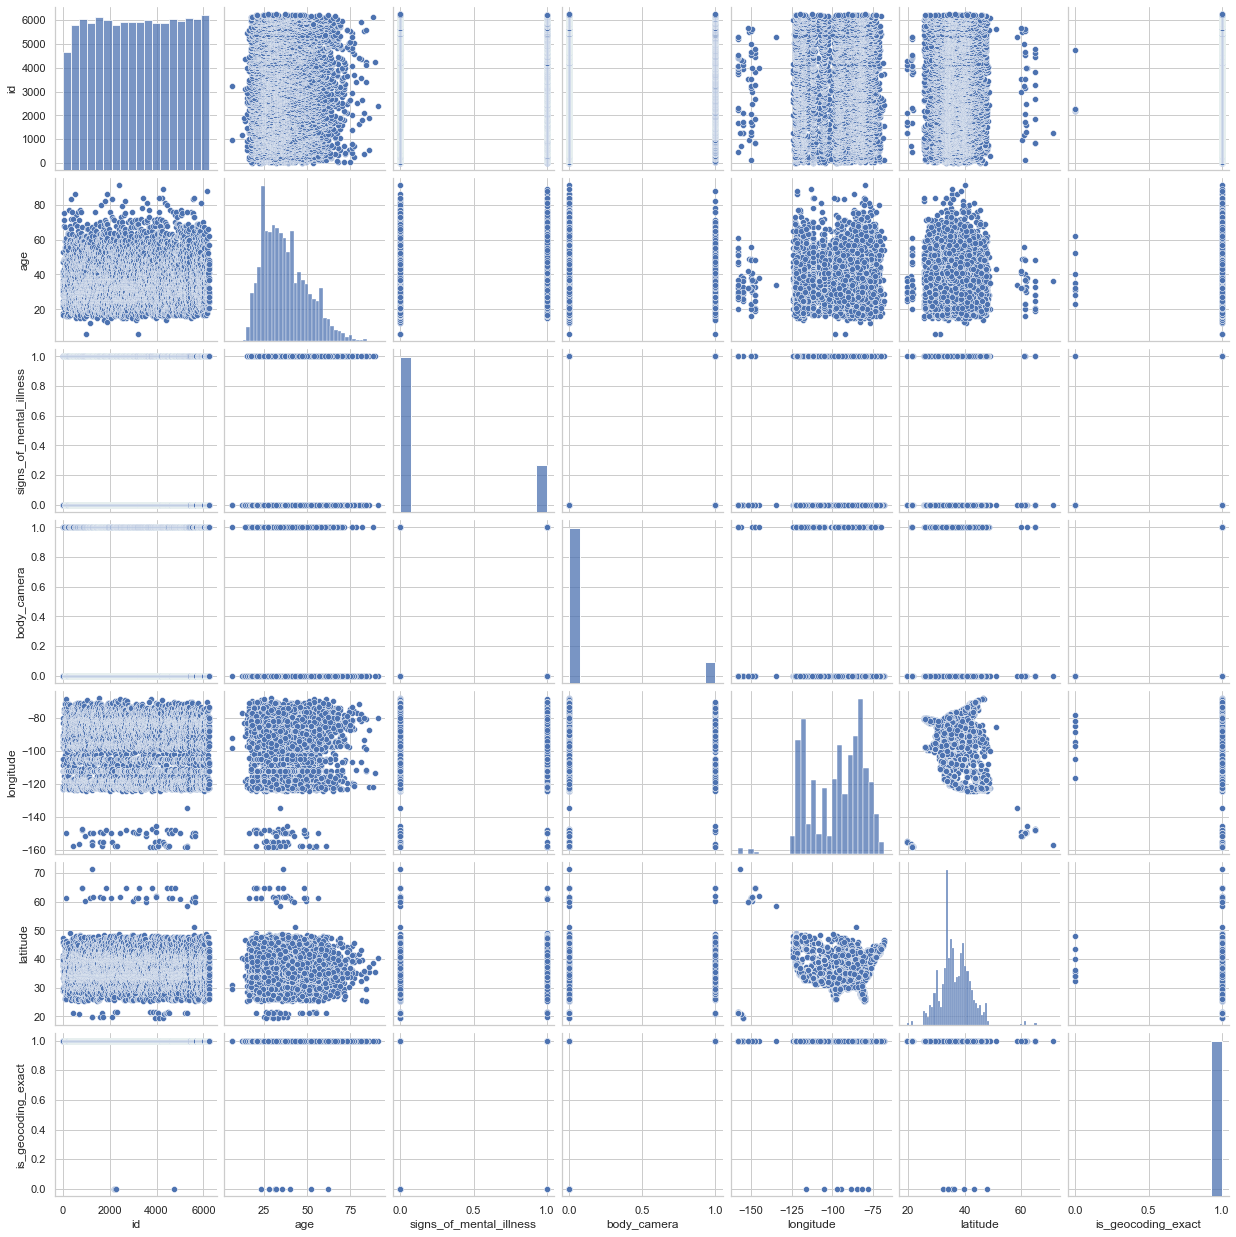

In [29]:
display(df2.columns)
sns.pairplot(data=df2)


### Encoding race values
We do miss about 600 entries of race.

This is the [original classification](https://github.com/washingtonpost/data-police-shootings):
race:

`race`:
- `W`: White, non-Hispanic
- `B`: Black, non-Hispanic
- `A`: Asian
- `N`: Native American
- `H`: Hispanic
- `O`: Other
- `None`: unknown

We want add weights the incident based on the actual amount of each race that lives in the US.

Used data [from wikipedia](https://en.wikipedia.org/wiki/Race_and_ethnicity_in_the_United_States#Racial_categories):
- `W`: 0.601
- `B`: 0.134
- `A`: 0.059
- `N`: 0.013
- `H`: 0.185
- `O`: 0.008

In [30]:
# Double check our different values 
display(df2['race'].unique())

# Add the weighted race values from wikipedia 
race_ratios = {
    'W': 0.601,
    'B': 0.134,
    'A': 0.059,
    'N': 0.013,
    'H': 0.185,
    'O': 0.008,
}




# TODO:Impute the unkown values





array(['A', 'W', 'H', 'B', 'O', nan, 'N'], dtype=object)

Need to recast some of the object types as correct values

In [31]:
# Data type conversions
# df2['name'] = df2['name'].astype('category')
df2['manner_of_death'] = df2['manner_of_death'].astype('category')
df2['armed'] = df2['armed'].astype('str')
df2['gender'] = df2['gender'].astype('str')
df2['race'] = df2['race'].astype('str')
df2['city'] = df2['state'].astype('str')
df2['threat_level'] = df2['threat_level'].astype('str')
df2['flee'] = df2['flee'].astype('str')
df2['signs_of_mental_illness'] = df2['signs_of_mental_illness'].astype('int')
df2['body_camera'] = df2['body_camera'].astype('str')
df2['is_geocoding_exact'] = df2['is_geocoding_exact'].astype('str')

# Add year
df2['year'] = pd.DatetimeIndex(df2['date']).year

# check again
df2.dtypes

id                                  int64
date                       datetime64[ns]
manner_of_death                  category
armed                              object
age                               float64
gender                             object
race                               object
city                               object
state                              object
signs_of_mental_illness             int64
threat_level                       object
flee                               object
body_camera                        object
longitude                         float64
latitude                          float64
is_geocoding_exact                 object
year                                int64
dtype: object

### <div class='exercise'><b>Section 3: Make some Plots!</b></div>
[▲ Return to contents](#Contents)

<div class='exercise'>

</div>

In [32]:
def plot_value_counts_barchart(df_plot, class_key, verbose=False, normalize=False,
                               is_custom=False, custom_values=None):
    # Grab the value counts, and use custom ones if needed
    # e.g. date or categroical group
    if is_custom:
        df_values = custom_values
    else:
        df_values = df_plot[class_key].value_counts(normalize=normalize)
    
    if verbose:
        display(df_values)
    
    # Create the plot ax object
    ax = df_values.plot(kind='bar', figsize=(14,8))
    
    # Set and rotate the labels for better readability 
#     ax.set_xticklabels(preds, rotation=45, direction="in", rotation_mode="anchor")
    ax.tick_params(axis='x', rotation=45, direction="in",)
    
    # Set the labels
    ax.set_xlabel(class_key.capitalize(), fontsize=15)
    ax.set_ylabel("Frequency", fontsize=15)
    
    # Create the title extenstion and then set title
    title_ext_norm = " - Normalized" if normalize == True else ""
    ax.set_title(f"Incident frequency by {class_key.capitalize()}{title_ext_norm}", fontsize=18)
    
    plt.show()

### State by state 
We see that CA, TX and FL by far have the most police indcident; however, these three states are also some of the most highly populated states in America.  For this reason, we also look at the number of incidents per one million residents in each state.

In [33]:
# Get the population of each state from the 2019 Cencus data
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}
population_summary = population_df[population_df['STATE']!=0][['NAME','POPESTIMATE2019']]
population_summary['abbrev'] = population_summary['NAME'].map(us_state_abbrev)
population_summary.set_index('abbrev',inplace=True)

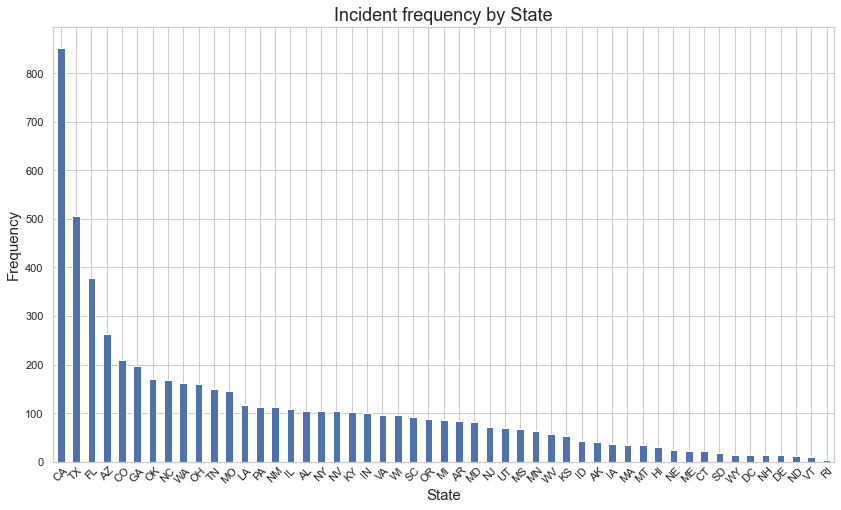

In [34]:
# Plot state by state count 
plot_value_counts_barchart(df2, 'state', verbose=False, normalize=False)

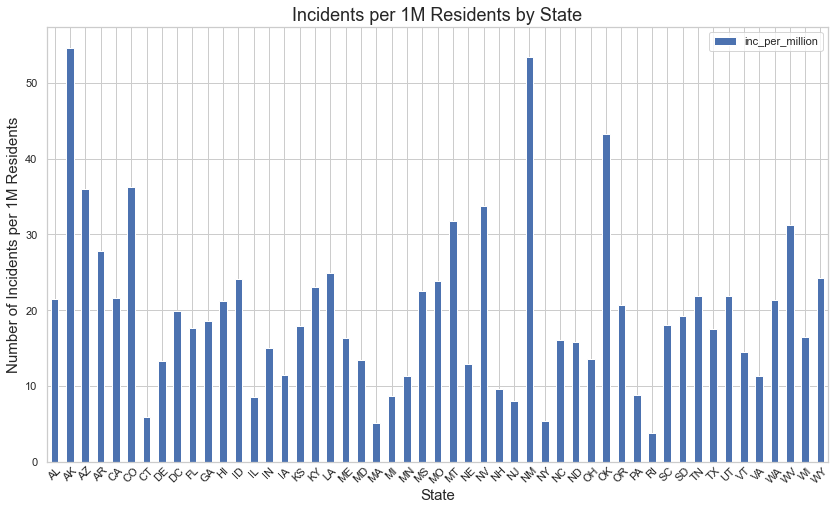

In [35]:
state_df= pd.concat([population_summary,df2['state'].groupby([df2.state]).agg('count')],axis=1).drop(index='PR')
state_df['inc_per_million'] = state_df['state']/state_df['POPESTIMATE2019']*1000000
ax = state_df.drop(columns=['NAME','POPESTIMATE2019','state']).plot(kind='bar', figsize=(14,8))
ax.tick_params(axis='x', rotation=45, direction="in",)
ax.set_xlabel("State", fontsize=15)
ax.set_ylabel("Number of Incidents per 1M Residents", fontsize=15)
ax.set_title("Incidents per 1M Residents by State", fontsize=18)
plt.show()

### Age Distribution

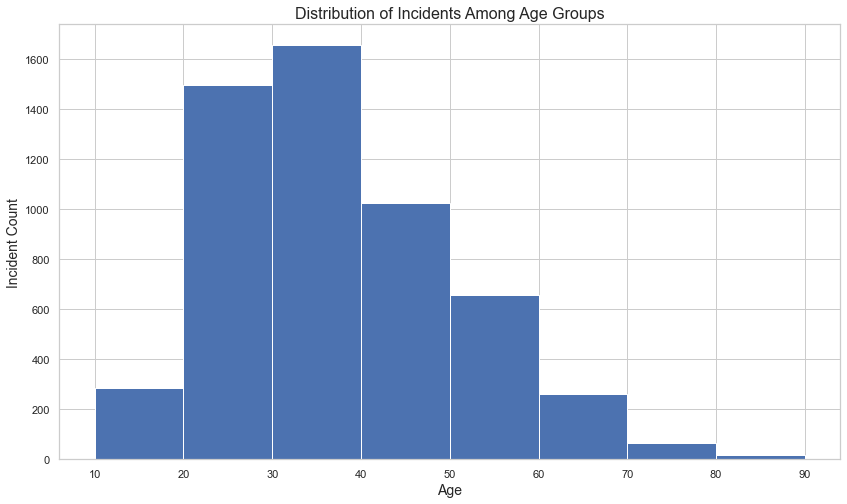

In [36]:
plt.figure(figsize=(14,8))
plt.hist(df2['age'],bins=range(10,100,10))
plt.xlabel("Age", fontsize=14)
plt.ylabel("Incident Count", fontsize=14)
plt.title("Distribution of Incidents Among Age Groups", fontsize=16)
plt.show()

### Year by Year


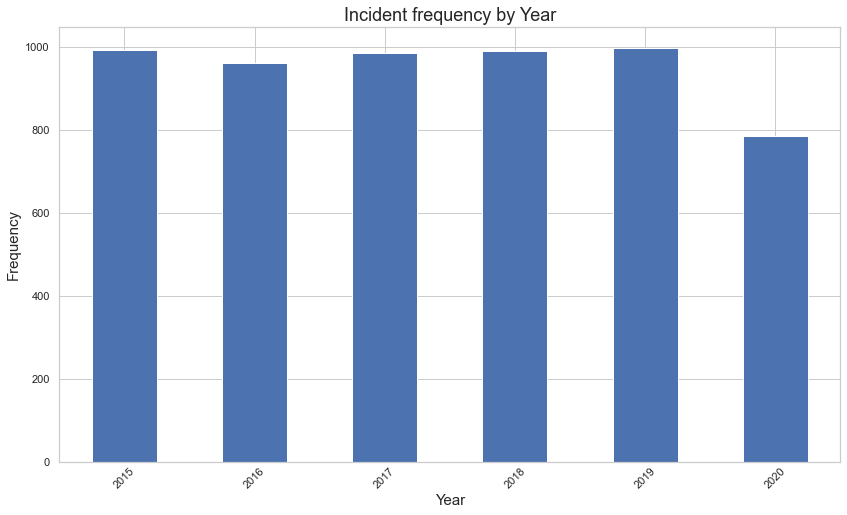

In [37]:
# Plot state by year 
df_by_year = df2['date'].groupby([df2.date.dt.year]).agg('count')
plot_value_counts_barchart(df2, 'year', is_custom=True, custom_values=df_by_year)

### Indicents by race

This is the [original classification](https://github.com/washingtonpost/data-police-shootings):
race:

`race`:
- `W`: White, non-Hispanic
- `B`: Black, non-Hispanic
- `A`: Asian
- `N`: Native American
- `H`: Hispanic
- `O`: Other
- `None`: unknown

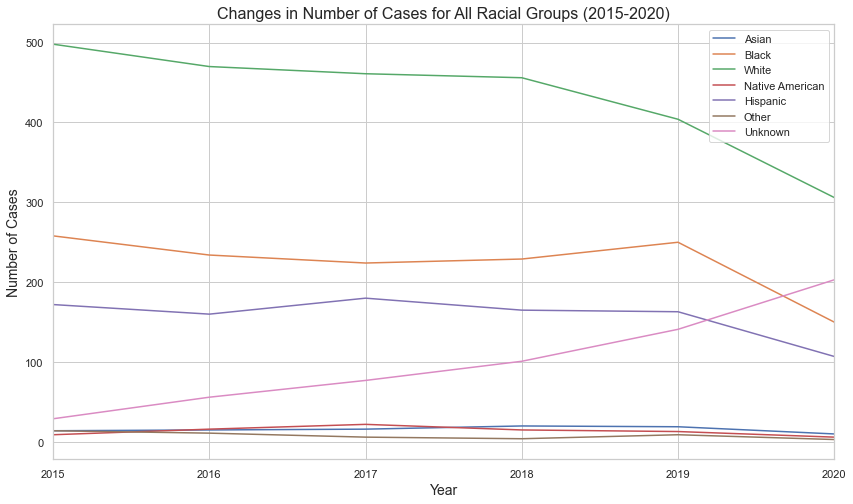

In [38]:
race_year_df = df2.groupby(['race','year'], as_index=False).count()
plt.figure(figsize=(14,8))
plt.plot(race_year_df[race_year_df['race']=='A']['year'],race_year_df[race_year_df['race']=='A']['id'], label='Asian')
plt.plot(race_year_df[race_year_df['race']=='B']['year'],race_year_df[race_year_df['race']=='B']['id'], label='Black')
plt.plot(race_year_df[race_year_df['race']=='W']['year'],race_year_df[race_year_df['race']=='W']['id'], label='White')
plt.plot(race_year_df[race_year_df['race']=='N']['year'],race_year_df[race_year_df['race']=='N']['id'], label='Native American')
plt.plot(race_year_df[race_year_df['race']=='H']['year'],race_year_df[race_year_df['race']=='H']['id'], label='Hispanic')
plt.plot(race_year_df[race_year_df['race']=='O']['year'],race_year_df[race_year_df['race']=='O']['id'], label='Other')
plt.plot(race_year_df[race_year_df['race']=='nan']['year'],race_year_df[race_year_df['race']=='nan']['id'], label='Unknown')
plt.xlim(2015,2020)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Cases", fontsize=14)
plt.title("Changes in Number of Cases for All Racial Groups (2015-2020)", fontsize=16)
plt.legend()

plt.show()

W      2595
B      1345
H       947
nan     607
A        94
Name: race, dtype: int64

A    0.000481
B    0.003032
H    0.001546
N    0.001882
O    0.001775
dtype: float64

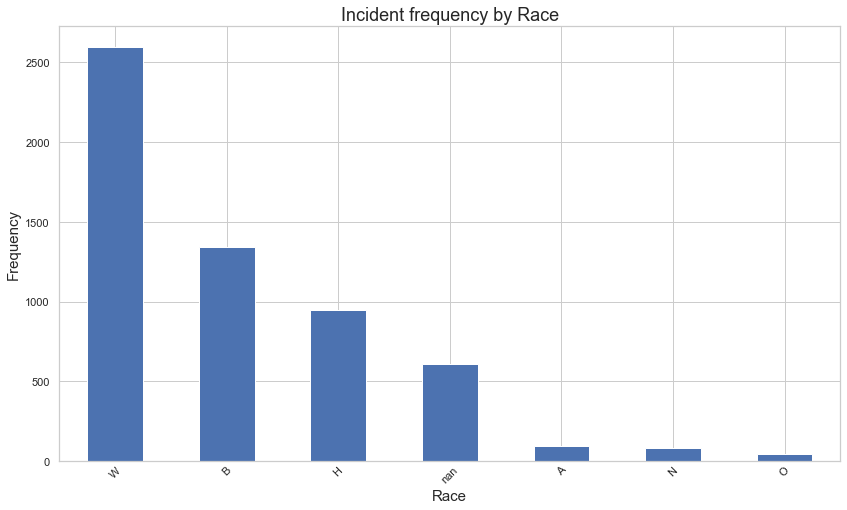

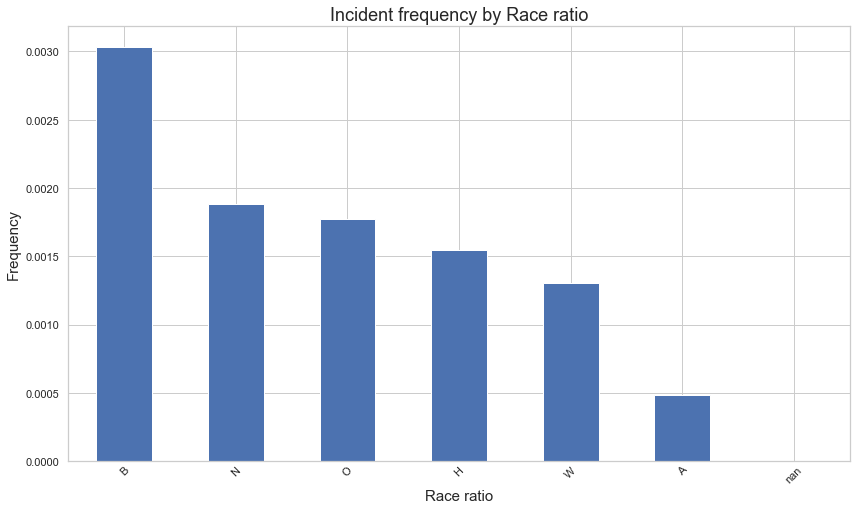

In [39]:
# Get weighted values
df_by_race = df2['race'].value_counts()
display(df_by_race.head())

# https://www.worldometers.info/world-population/us-population
total_pop = 331002651

# Add the weighted race values from wikipedia x populatio
race_ratios = pd.Series({
    'W': 0.601,
    'B': 0.134,
    'A': 0.059,
    'N': 0.013,
    'H': 0.185,
    'O': 0.008,
}) * total_pop

# print(race_ratios)

# Divide the indicent counts by their representation amount 
df_by_race_ratio = (df_by_race/race_ratios) * 100
display(df_by_race_ratio.head())


# Plot state by race
plot_value_counts_barchart(df2, 'race')

# Indicent plot by ratio race in US 
df_by_race_ratio.sort_values(ascending=False, inplace=True)
plot_value_counts_barchart(df2, 'Race ratio', is_custom=True, custom_values=df_by_race_ratio)



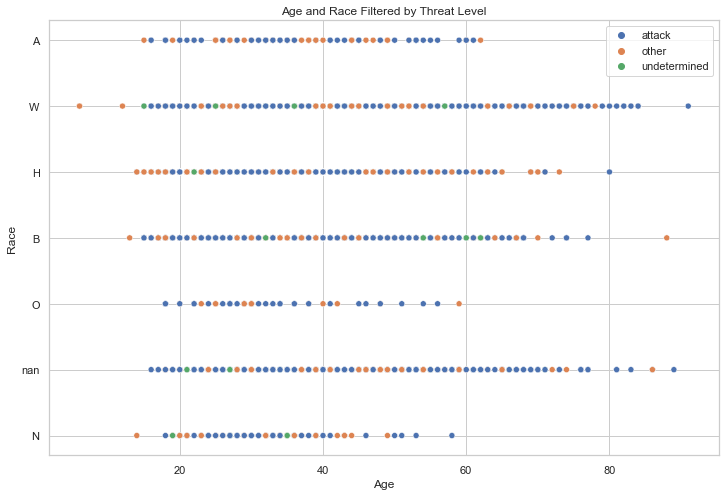

In [40]:
# scatter of various predictors
x = df2['age']
y = df2['race']


plt.figure(figsize = (12,8))
sns.scatterplot(data=df2, 
                x=x, 
                y=y, 
                hue="threat_level")
#plt.scatter(x,y, label='Training data', color='darkblue')
#plt.scatter(x_test,y_test, label='Testing data', color='lightblue')
plt.title('Age and Race Filtered by Threat Level')
plt.xlabel('Age')
plt.ylabel('Race')
plt.legend()
plt.show()

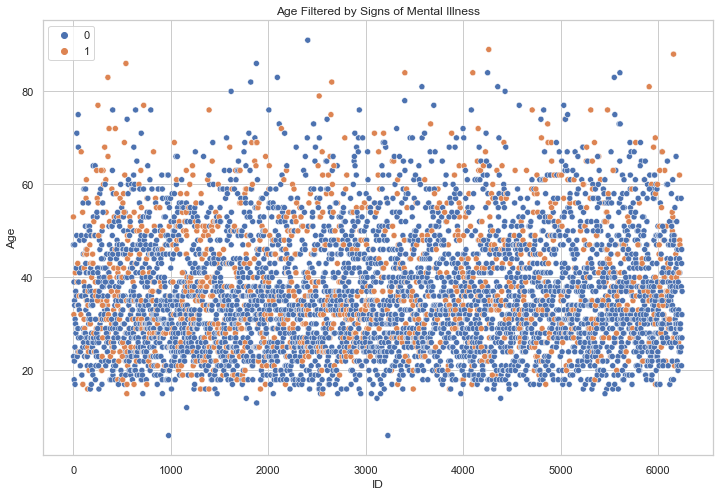

In [41]:
# your code here

# scatter of various predictors
x = df2['id']
y = df2['age']


plt.figure(figsize = (12,8))
sns.scatterplot(data=df2, 
                x=x, 
                y=y, 
                hue="signs_of_mental_illness")
#plt.scatter(x,y, label='Training data', color='darkblue')
#plt.scatter(x_test,y_test, label='Testing data', color='lightblue')
plt.title('Age Filtered by Signs of Mental Illness')
plt.xlabel('ID')
plt.ylabel('Age')
plt.legend()
plt.show()

*Your answer here*  


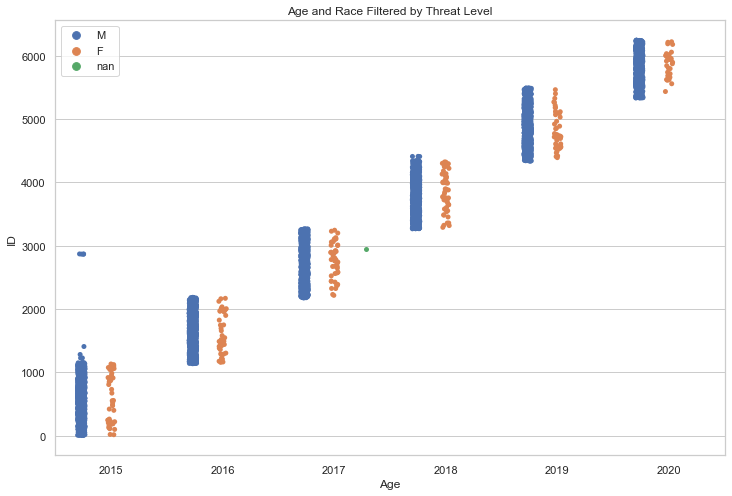

In [42]:
# your code here

# scatter of various predictors
x = df2['year']
y = df2['id']


plt.figure(figsize = (12,8))
sns.stripplot(data=df2, 
              x=x, 
              y=y, 
              hue="gender",
              dodge=True)
plt.title('Age and Race Filtered by Threat Level')
plt.xlabel('Age')
plt.ylabel('ID')
plt.legend()
plt.show()


*Your answer here*  


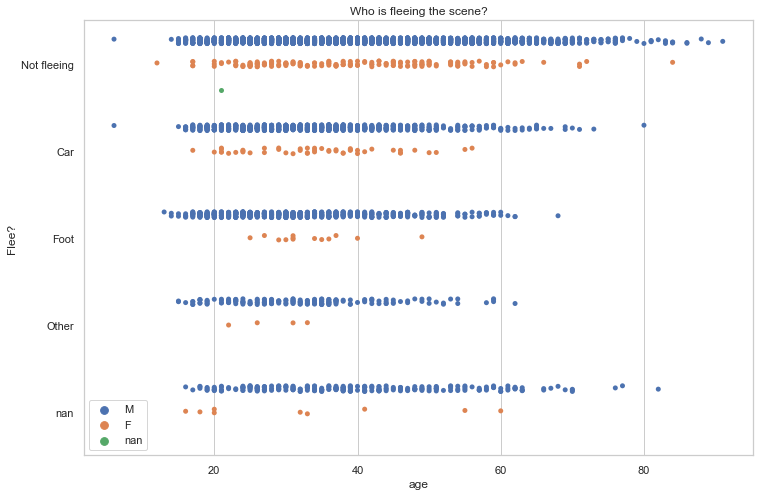

In [43]:
# your code here

# scatter of various predictors
x = df2['age']
y = df2['flee']


plt.figure(figsize = (12,8))
sns.stripplot(data=df2, 
              x=x, 
              y=y, 
              hue="gender",
              dodge=True)
plt.title('Who is fleeing the scene?')
plt.xlabel('age')
plt.ylabel('Flee?')
plt.legend()
plt.show()

No handles with labels found to put in legend.


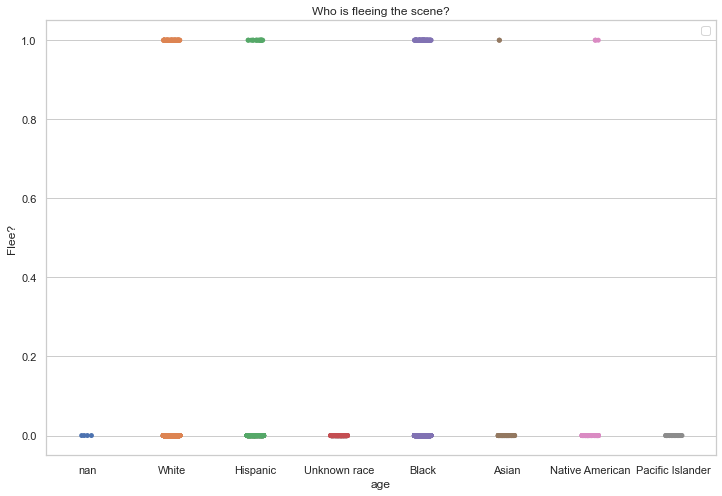

In [44]:
# your code here

# scatter of various predictors
x = df1["Victim's race"]
y = df1["Criminal Charges?_bool"]


plt.figure(figsize = (12,8))
sns.stripplot(data=df2, 
              x=x, 
              y=y, 
              dodge=True)
plt.title('Who is fleeing the scene?')
plt.xlabel('age')
plt.ylabel('Flee?')
plt.legend()
plt.show()




<AxesSubplot:>

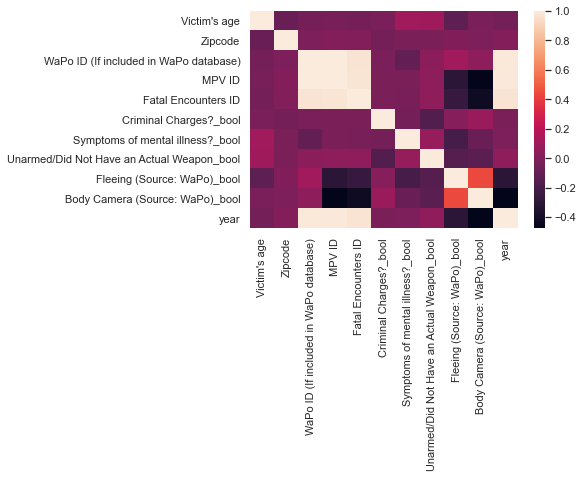

In [45]:
# your code here

# Calculate correlations
corr = df1.corr()
 
# Heatmap
sns.heatmap(corr)

<AxesSubplot:>

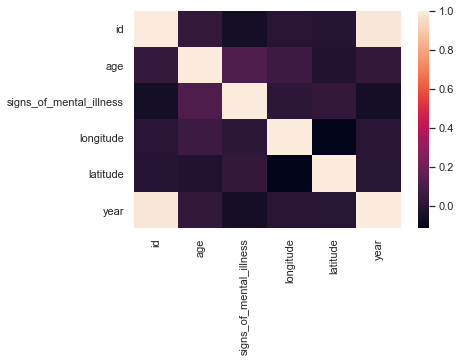

In [46]:
# your code here

# Calculate correlations
corr = df2.corr()
 
# Heatmap
sns.heatmap(corr)


### <div class='exercise'><b>Section 4: Initial Look at Models</b></div>
[▲ Return to contents](#Contents)

<div class='exercise'>

</div>



In [47]:
# your code here



In [48]:
# your code here



In [49]:
# your code here


In [50]:
# your code here


*Your answer here*  


In [51]:
# your code here


*Your answer here*  


### <div class='exercise'><b>Section 5: Appendix</b></div>
[▲ Return to contents](#Contents)
<div class='exercise'>

</div>


*Your answer here*  



*Your answer here*  


*Your answer here*  


*Your answer here*  


*Your answer here*  


### End of Notebook